## Data1_age_sex_race-split and clean data 

In [ ]:
import pandas as pd
import numpy as np
import re

file_id='1qEV10qxXWAEHvxO9Y8rubrn1KHV0GitS'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)

df_uk_rain=pd.read_csv(csv_url, delimiter=',',header=0)
df_uk_rain.columns
#df_uk_rain['SexAge_Race']

df_uk_rain[['Sex&Age', 'Race']]=df_uk_rain['SexAge_Race'].str.split('_',expand=True)

def mysplit(s):
   
   #for s in df_uk_rain['Sex&Age']:
   head=s.rstrip('.0123456789') 
       

   return head 
  
A=[mysplit(s) for s in df_uk_rain['Sex&Age']]
df_uk_rain['Sex']=A
df_uk_rain


def mysplit(s):
    
    tail=s.lstrip('ABCDEFGHIJKLMNOPUSTUVWKYZ')
    return float (tail)
    
B=[mysplit(s) for s in df_uk_rain['Sex&Age']]
df_uk_rain['Age']=B
df_uk_rain

df_uk_rain.head()





,subject_ID,SexAge_Race,Sex&Age,Race,Sex,Age
0,1,MALE41.2_White,MALE41.2,White,MALE,41.2
1,2,FEMALE42.9_White,FEMALE42.9,White,FEMALE,42.9
2,3,FEMALE38.5_White,FEMALE38.5,White,FEMALE,38.5
3,4,FEMALE35.6_Hispanic,FEMALE35.6,Hispanic,FEMALE,35.6
4,5,FEMALE48.5_White,FEMALE48.5,White,FEMALE,48.5


## Data2_SRH -split POST and PRE to different cloumns based on Time 

In [ ]:
import pandas as pd
import numpy as np
import re

file_id='1PsPBiX23rpoNu4bmP74kHLNMvxzqwmSr'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_SRH=pd.read_csv(csv_url, delimiter=',',header=0)
df_SRH
df_SRH=df_SRH.rename(columns={'id':'subject_ID'})
df_SRH
df_SRH_PRE=df_SRH[df_SRH['TIME'].isin(['PRE'])]
df_SRH_PRE.describe() #Found more than 5000 rows-->Debug
df_SRH_PRE
df_SRH_PRE_uniqe=df_SRH_PRE.drop_duplicates(subset='subject_ID',keep='first')# Found duplicates and drop them
df_SRH_PRE_uniqe.describe()

df_SRH_POST=df_SRH[df_SRH['TIME'].isin(['POST'])]
df_SRH_POST=df_SRH_POST.rename(columns={'TIME':'TIME_After','SRH':'SRH_After'})
df_SRH_POST.describe() #Found more than 5000 rows-->Debug

df_SRH_POST_uniqe=df_SRH_POST.drop_duplicates(subset='subject_ID',keep='first')# Found duplicates and dropped them
df_SRH_POST_uniqe.describe()


,subject_ID,trt
count,5000.000000,5000.00000
mean,2500.500000,0.50000
std,1443.520003,0.50005
min,1.000000,0.00000
25%,1250.750000,0.00000
50%,2500.500000,0.50000
75%,3750.250000,1.00000
max,5000.000000,1.00000


In [ ]:
Data2=pd.merge(df_uk_rain,df_SRH)
Data2_Pre_in=pd.merge(Data2,df_SRH_PRE_uniqe)
Data2_Pre_in.head()
Data2_All_in=pd.merge(Data2_Pre_in,df_SRH_POST_uniqe)
Data2_All_in.head()



,subject_ID,SexAge_Race,Sex&Age,Race,Sex,Age,trt,TIME,SRH,TIME_After,SRH_After
0,1,MALE41.2_White,MALE41.2,White,MALE,41.2,1,PRE,Good,POST,Poor
1,2,FEMALE42.9_White,FEMALE42.9,White,FEMALE,42.9,1,PRE,Poor,POST,Very Poor
2,3,FEMALE38.5_White,FEMALE38.5,White,FEMALE,38.5,1,PRE,Satisfactory,POST,Good
3,4,FEMALE35.6_Hispanic,FEMALE35.6,Hispanic,FEMALE,35.6,1,PRE,Poor,POST,Good
4,5,FEMALE48.5_White,FEMALE48.5,White,FEMALE,48.5,1,PRE,Poor,POST,Poor


## Data3a & Data3b-Merge and clean data

In [ ]:
import pandas as pd
import numpy as np
import re

file_id='1aKLrT79eQBaHete5o3gIdaoAXAQ265HR'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_tre_weight=pd.read_csv(csv_url, delimiter=',',header=0)

#df_tre_weigh_uniqe=df_tre_weight.drop_duplicates(subset='subject_ID',keep='first')# Found duplicates and dropped them
#df_SRH_POST_uniqe.describe()
df_tre_weight=df_tre_weight.rename(columns={'Id':'subject_ID'})
df_tre_pre_weight=df_tre_weight[df_tre_weight['POST_WEIGHT'].isin(['NaN'])]
df_tre_pre_weight_clean=df_tre_pre_weight.drop(['POST_WEIGHT'],axis=1)
df_tre_pre_weight_clean.head()

df_tre_post_weight=df_tre_weight[df_tre_weight['PRE_WEIGHT'].isin(['NaN'])]
df_tre_post_weight_clean=df_tre_post_weight.drop(['PRE_WEIGHT'],axis=1)
df_tre_post_weight_clean.head()

df_tre_both_weight=pd.merge(df_tre_pre_weight_clean,df_tre_post_weight_clean)
df_tre_both_weight
df_tre_both_weight_uniqe=df_tre_both_weight.drop_duplicates(subset='subject_ID',keep='first')
df_tre_both_weight_uniqe.head()

,subject_ID,PRE_WEIGHT,POST_WEIGHT
0,1,135.2510,125.6678
1,2,154.8713,153.9882
2,3,128.1951,115.5969
3,4,183.4600,177.0187
4,5,166.3726,163.9262


## 1-2500 row of Treatment Group dataset with background-Prepared for the later anaysis



In [ ]:
df_tre_background=pd.merge(Data2_All_in, df_tre_both_weight_uniqe)
#sex_mapping={'FEMALE':'0','MALE':'1'}#transfer female to 0; male to 1
#df_tre_background['Sex']=df_tre_background['Sex'].map(sex_mapping)

pre_SRH_mapping={'Very Poor':'1','Poor':'2', 'Satisfactory':'3','Good':'4','Excellent':'5'}
#transfer 'Very Poor'to'1','Poor'to'2', 'Satisfactory'to'3','Good'to'4','Excellent'to'5'
df_tre_background['SRH']=df_tre_background['SRH'].map(pre_SRH_mapping)

post_SRH_mapping={'Very Poor':'1','Poor':'2', 'Satisfactory':'3','Good':'4','Excellent':'5'}
#transfer 'Very Poor'to'1','Poor'to'2', 'Satisfactory'to'3','Good'to'4','Excellent'to'5'
df_tre_background['SRH_After']=df_tre_background['SRH_After'].map(post_SRH_mapping)


#df_tre_background['SRH_difference']=df_tre_background['SRH_After']-df_tre_background['SRH']
# Add new cloumn--> SRH_difference (Postive numbers mean feeling healthier)

df_tre_background['Weight_difference']=df_tre_background['PRE_WEIGHT']-df_tre_background['POST_WEIGHT']
# Add new cloumn--> Weight_difference (Postive numbers mean losing weight)

#df_tre_background['SRH_difference'> '0']=1


df_tre_background=df_tre_background.drop(['SexAge_Race','Sex&Age'],axis=1)
df_tre_background['Group']=1 #treatment group 


df_tre_background.head()

,subject_ID,Race,Sex,Age,trt,TIME,SRH,TIME_After,SRH_After,PRE_WEIGHT,POST_WEIGHT,Weight_difference,Group
0,1,White,MALE,41.2,1,PRE,4,POST,2,135.2510,125.6678,9.5832,1
1,2,White,FEMALE,42.9,1,PRE,2,POST,1,154.8713,153.9882,0.8831,1
2,3,White,FEMALE,38.5,1,PRE,3,POST,4,128.1951,115.5969,12.5982,1
3,4,Hispanic,FEMALE,35.6,1,PRE,2,POST,4,183.4600,177.0187,6.4413,1
4,5,White,FEMALE,48.5,1,PRE,2,POST,2,166.3726,163.9262,2.4464,1


In [ ]:
df_tre_background.describe()

,subject_ID,Age,trt,SRH,SRH_After,PRE_WEIGHT,POST_WEIGHT,SRH_difference,Weight_difference,True,Group
count,2500.00000,2500.000000,2500.0,2496.000000,2494.000000,2500.000000,2500.000000,2491.000000,2500.000000,2500.0,2500.0
mean,1250.50000,38.935800,1.0,2.960337,3.452285,159.786775,150.784382,0.487756,9.002393,1.0,1.0
std,721.83216,7.844144,0.0,1.575752,1.479614,21.803354,21.466418,1.185653,8.960643,0.0,0.0
min,1.00000,18.100000,1.0,1.000000,1.000000,82.803790,78.090870,-3.000000,-18.347900,1.0,1.0
25%,625.75000,33.700000,1.0,1.000000,2.000000,144.966550,135.869950,0.000000,2.372100,1.0,1.0
50%,1250.50000,38.900000,1.0,3.000000,4.000000,159.066500,150.781150,0.000000,9.112550,1.0,1.0
75%,1875.25000,44.125000,1.0,5.000000,5.000000,174.284100,164.941650,1.000000,15.681450,1.0,1.0
max,2500.00000,69.300000,1.0,5.000000,5.000000,242.763200,221.296700,4.000000,38.801200,1.0,1.0


In [ ]:
file_id='1bmajTbkscKKmNw2QpWlbUntVgBobfqrY'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url1=link.format(FILE_ID=file_id)
df_ctr_weight=pd.read_csv(csv_url1, delimiter=',',header=0)
df_ctr_weight.head# control group starts from 2501

df_ctr_weight=df_ctr_weight.rename(columns={'obs_ID':'subject_ID'})
df_ctr_weight.head()
df_ctr_pre_weight=df_ctr_weight[df_ctr_weight['POST_WEIGHT'].isin(['NaN'])]
df_ctr_pre_weight_clean=df_ctr_pre_weight.drop(['POST_WEIGHT'],axis=1)
df_ctr_pre_weight_clean.head()

df_ctr_post_weight=df_ctr_weight[df_ctr_weight['PRE_WEIGHT'].isin(['NaN'])]
df_ctr_post_weight_clean=df_ctr_post_weight.drop(['PRE_WEIGHT'],axis=1)
df_ctr_post_weight_clean.head()

df_ctr_both_weight=pd.merge(df_ctr_pre_weight_clean,df_ctr_post_weight_clean)
df_ctr_both_weight.describe()
df_ctr_both_weight_uniqe=df_ctr_both_weight.drop_duplicates(subset='subject_ID',keep='first')# Found duplicates and dropped them



#df_ctr_background['Group']=0 #Control group 

df_ctr_both_weight_uniqe.describe()

,subject_ID,PRE_WEIGHT,POST_WEIGHT
count,2500.00000,2500.000000,2500.000000
mean,3750.50000,159.923403,159.150366
std,721.83216,21.391016,21.043802
min,2501.00000,91.237920,90.156130
25%,3125.75000,145.369300,144.722825
50%,3750.50000,159.126750,158.671500
75%,4375.25000,174.413975,173.476575
max,5000.00000,232.700800,229.274700


## 2501-5000 row of Control Group dataset with background-Prepared for the later anaysis

In [ ]:
df_ctr_background=pd.merge(Data2_All_in, df_ctr_both_weight_uniqe)

#sex_mapping={'FEMALE':'0','MALE':'1'}#transfer female to 0; male to 1
#df_ctr_background['Sex']=df_ctr_background['Sex'].map(sex_mapping)

pre_SRH_mapping={'Very Poor':'1','Poor':'2', 'Satisfactory':'3','Good':'4','Excellent':'5'}
#transfer 'Very Poor'to'1','Poor'to'2', 'Satisfactory'to'3','Good'to'4','Excellent'to'5'
df_ctr_background['SRH']=df_ctr_background['SRH'].map(pre_SRH_mapping)

post_SRH_mapping={'Very Poor':'1','Poor':'2', 'Satisfactory':'3','Good':'4','Excellent':'5'}
#transfer 'Very Poor'to'1','Poor'to'2', 'Satisfactory'to'3','Good'to'4','Excellent'to'5'
df_ctr_background['SRH_After']=df_ctr_background['SRH_After'].map(post_SRH_mapping)



#df_ctr_background['SRH_difference']=df_ctr_background['SRH_After']-df_ctr_background['SRH']
# Add new cloumn--> SRH_difference (Postive numbers mean feeling healthier)

df_ctr_background['Weight_difference']=df_ctr_background['PRE_WEIGHT']-df_ctr_background['POST_WEIGHT']
# Add new cloumn--> Weight_difference (Postive numbers mean losing weight)
df_ctr_background=df_ctr_background.drop(['SexAge_Race','Sex&Age'],axis=1)
#df_ctr_background.loc[[df['SRH_difference']==0,'SRH_difference_Y']=='0'#df_ctr_background['SRH_difference'].map(lambda:(x<0 and '0') or (x>0 and'1')
#df_ctr_background.loc[[df['SRH_difference']<0,'SRH_difference_Y']='0' 
#df_ctr_background.loc[[df['SRH_difference']>0,'SRH_difference_Y']='1'                      
#df_ctr_background[df_ctr_background['SRH_difference'].apply(lamda x:x>0,axis=1)]

df_ctr_background['Group']=0 #Control group 



df_ctr_background.head()



,subject_ID,Race,Sex,Age,trt,TIME,SRH,TIME_After,SRH_After,PRE_WEIGHT,POST_WEIGHT,Weight_difference,Group
0,2501,White,FEMALE,42.2,0,PRE,2,POST,2,159.7587,158.6920,1.0667,0
1,2502,Hispanic,MALE,46.6,0,PRE,1,POST,1,176.1611,174.8270,1.3341,0
2,2503,Hispanic,MALE,39.1,0,PRE,4,POST,3,181.3907,179.9042,1.4865,0
3,2504,Hispanic,FEMALE,34.7,0,PRE,5,POST,5,175.6615,175.2032,0.4583,0
4,2505,White,FEMALE,49.8,0,PRE,3,POST,2,136.5405,137.9253,-1.3848,0


In [ ]:
df_ctr_background.describe()

,subject_ID,Age,trt,PRE_WEIGHT,POST_WEIGHT,SRH_difference,Weight_difference,Group
count,2500.00000,2500.000000,2500.0,2500.000000,2500.000000,2492.000000,2500.000000,2500.0
mean,3750.50000,38.844040,0.0,159.923403,159.150366,0.010433,0.773036,0.0
std,721.83216,8.008994,0.0,21.391016,21.043802,1.128395,1.660073,0.0
min,2501.00000,18.200000,0.0,91.237920,90.156130,-4.000000,-4.832100,0.0
25%,3125.75000,33.200000,0.0,145.369300,144.722825,0.000000,-0.407975,0.0
50%,3750.50000,38.700000,0.0,159.126750,158.671500,0.000000,0.774800,0.0
75%,4375.25000,44.100000,0.0,174.413975,173.476575,0.000000,1.878900,0.0
max,5000.00000,66.500000,0.0,232.700800,229.274700,4.000000,6.116000,0.0


In [ ]:
df_combine_trectr=pd.concat([ df_tre_both_weight_uniqe,df_ctr_both_weight_uniqe])
df_combine_trectr.head()# Combine Data3a &3b--Final

,subject_ID,PRE_WEIGHT,POST_WEIGHT
0,1,135.2510,125.6678
1,2,154.8713,153.9882
2,3,128.1951,115.5969
3,4,183.4600,177.0187
4,5,166.3726,163.9262


## Combine All 4 Datasheets in one

In [ ]:
df_all_4data=pd.merge(Data2_All_in,df_combine_trectr)
df_all_4data_trim=df_all_4data.drop(['SexAge_Race', 'Sex&Age'],axis=1)
df_all_4data_trim.head()


,subject_ID,Race,Sex,Age,trt,TIME,SRH,TIME_After,SRH_After,PRE_WEIGHT,POST_WEIGHT
0,1,White,MALE,41.2,1,PRE,Good,POST,Poor,135.2510,125.6678
1,2,White,FEMALE,42.9,1,PRE,Poor,POST,Very Poor,154.8713,153.9882
2,3,White,FEMALE,38.5,1,PRE,Satisfactory,POST,Good,128.1951,115.5969
3,4,Hispanic,FEMALE,35.6,1,PRE,Poor,POST,Good,183.4600,177.0187
4,5,White,FEMALE,48.5,1,PRE,Poor,POST,Poor,166.3726,163.9262


## Data Exploration

In [ ]:
df_all_4data_trim.isnull().sum(axis=0)#Check Missing value

subject_ID     0
Race           0
Sex            0
Age            0
trt            0
TIME           0
SRH            0
TIME_After     0
SRH_After      0
PRE_WEIGHT     0
POST_WEIGHT    0
dtype: int64

In [ ]:
df_all_4data_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
subject_ID     5000 non-null int64
Race           5000 non-null object
Sex            5000 non-null object
Age            5000 non-null float64
trt            5000 non-null int64
TIME           5000 non-null object
SRH            5000 non-null object
TIME_After     5000 non-null object
SRH_After      5000 non-null object
PRE_WEIGHT     5000 non-null float64
POST_WEIGHT    5000 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 468.8+ KB


In [ ]:
df_all_4data_trim.describe(include=['O'])

,Race,Sex,TIME,SRH,TIME_After,SRH_After
count,5000,5000,5000,5000,5000,5000
unique,5,2,1,7,1,7
top,White,FEMALE,PRE,Excellent,POST,Excellent
freq,2876,2556,5000,1369,5000,1567


In [ ]:
df_all_4data_trim.describe()

,subject_ID,Age,trt,PRE_WEIGHT,POST_WEIGHT
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,38.889920,0.50000,159.855089,154.967374
std,1443.520003,7.926338,0.50005,21.596117,21.661830
min,1.000000,18.100000,0.00000,82.803790,78.090870
25%,1250.750000,33.400000,0.00000,145.126975,140.109450
50%,2500.500000,38.800000,0.50000,159.113800,154.624650
75%,3750.250000,44.100000,1.00000,174.384500,169.540225
max,5000.000000,69.300000,1.00000,242.763200,229.274700


#Observation through all data before tests
1. The number of female is 56 more.
2. White is half more in data.
3. PRO-SRH: Excellent has 1369. POST_SRH: Excellent has 1567. Averagely, after time, 197 tester's SRH chnaged to excellent. 
4. The tester's age is around 39.,The range of the age is 51. The Oldest is 69.3. The youngest is 18.1. When we see the plot, we can understand it is normal distribution.

Text(0.5, 1.0, 'Age distribution in 5000 samples')

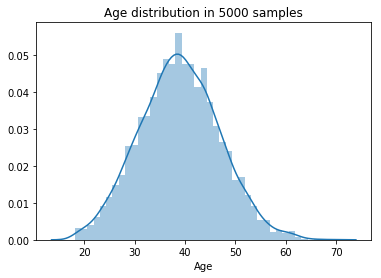

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot (df_all_4data_trim['Age']) 
plt.title('Age distribution in 5000 samples')

Text(0.5, 1.0, 'Race distribution in 5000 samples')

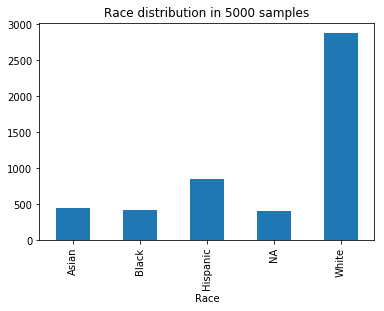

In [ ]:

df_all_4data_trim.groupby('Race').size().plot.bar()
plt.title('Race distribution in 5000 samples')


-From all data, white are about 3 times more than other race.

Treament Group and Control Group difference

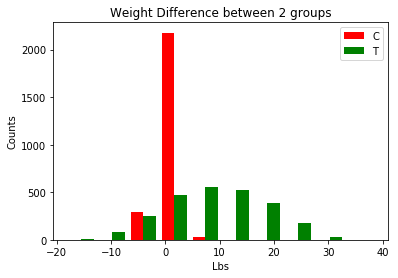

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

colors=['r','g']
index=['control','treatment']
flg,ax1=plt.subplots()
ax1.hist([df_ctr_background['Weight_difference'],df_tre_background['Weight_difference']],label=index,color=colors)



plt.title('Weight Difference between 2 groups')
plt.xlabel('Lbs')
plt.ylabel('Counts')
plt.legend('CT')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


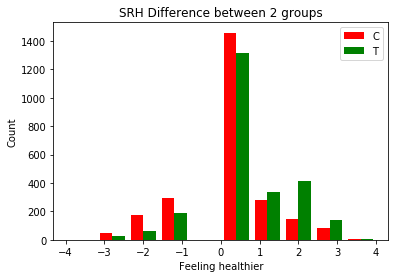

In [ ]:
import matplotlib.pyplot as plt
colors=['r','g']
flg,ax1=plt.subplots()
ax1.hist([df_ctr_background['SRH_difference'],df_tre_background['SRH_difference']], color=colors)
plt.title('SRH Difference between 2 groups')
plt.xlabel('Feeling healthier')
plt.ylabel('Count')
plt.legend('CT')
plt.show()

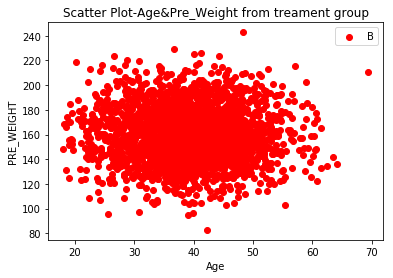

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_title('Scatter Plot-Age&Pre_Weight from treament group')
plt.xlabel('Age')
plt.ylabel('PRE_WEIGHT')
ax1.scatter(df_tre_background['Age'],df_tre_background['PRE_WEIGHT'],c='r',marker='o')
plt.legend('B')

plt.show()


## Treatment Group- Age and weight change before and after the exercise

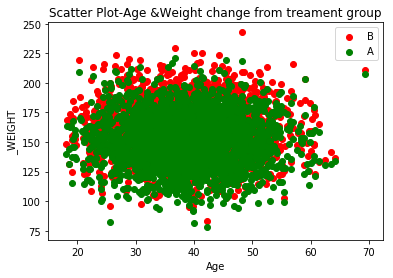

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_title('Scatter Plot-Age &Weight change from treament group') #Age vs weight change form treatment group
plt.xlabel('Age')
plt.ylabel('_WEIGHT')
ax1.scatter(df_tre_background['Age'],df_tre_background['PRE_WEIGHT'],c='r',marker='o')
ax1.scatter(df_tre_background['Age'],df_tre_background['POST_WEIGHT'],c='g',marker='o')
plt.legend('BA')

plt.show()

## Control Group-Age and weight change before and after the exercise

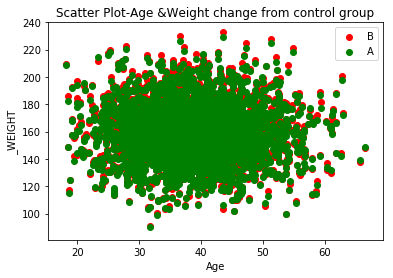

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_title('Scatter Plot-Age &Weight change from control group') #Age vs weight change form contral group
plt.xlabel('Age')
plt.ylabel('_WEIGHT')
ax1.scatter(df_ctr_background['Age'],df_ctr_background['PRE_WEIGHT'],c='r',marker='o')
ax1.scatter(df_ctr_background['Age'],df_ctr_background['POST_WEIGHT'],c='g',marker='o')
plt.legend('BA')

plt.show()

## Treatment Group-See correlation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_tre_background.columns


corr=df_tre_background[['Age','Weight_difference','PRE_WEIGHT','POST_WEIGHT','SRH_difference']].corr()
corr

,Age,Weight_difference,PRE_WEIGHT,POST_WEIGHT,SRH_difference
Age,1.000000,0.008957,-0.005792,-0.009622,0.058602
Weight_difference,0.008957,1.000000,0.242799,-0.170816,0.175424
PRE_WEIGHT,-0.005792,0.242799,1.000000,0.914345,0.079892
POST_WEIGHT,-0.009622,-0.170816,0.914345,1.000000,0.007960
SRH_difference,0.058602,0.175424,0.079892,0.007960,1.000000


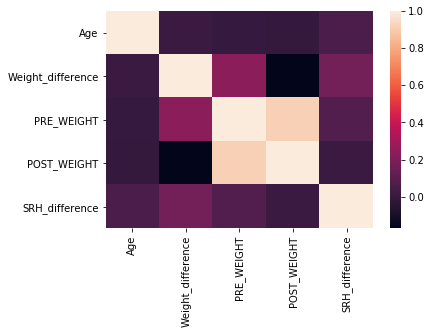

In [ ]:
sns.heatmap(corr)

In [ ]:
df_tre_background.describe()

,subject_ID,Age,trt,SRH,SRH_After,PRE_WEIGHT,POST_WEIGHT,SRH_difference,Weight_difference,True,Group
count,2500.00000,2500.000000,2500.0,2496.000000,2494.000000,2500.000000,2500.000000,2491.000000,2500.000000,2500.0,2500.0
mean,1250.50000,38.935800,1.0,2.960337,3.452285,159.786775,150.784382,0.487756,9.002393,1.0,1.0
std,721.83216,7.844144,0.0,1.575752,1.479614,21.803354,21.466418,1.185653,8.960643,0.0,0.0
min,1.00000,18.100000,1.0,1.000000,1.000000,82.803790,78.090870,-3.000000,-18.347900,1.0,1.0
25%,625.75000,33.700000,1.0,1.000000,2.000000,144.966550,135.869950,0.000000,2.372100,1.0,1.0
50%,1250.50000,38.900000,1.0,3.000000,4.000000,159.066500,150.781150,0.000000,9.112550,1.0,1.0
75%,1875.25000,44.125000,1.0,5.000000,5.000000,174.284100,164.941650,1.000000,15.681450,1.0,1.0
max,2500.00000,69.300000,1.0,5.000000,5.000000,242.763200,221.296700,4.000000,38.801200,1.0,1.0


In [ ]:
df_tre_background.describe(include=['O'])

,Race,Sex,TIME,TIME_After
count,2500,2500,2500,2500
unique,5,2,1,1
top,White,FEMALE,PRE,POST
freq,1436,1271,2500,2500


## Control Group-see correlation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_ctr_background.columns


corr1=df_ctr_background[['Age','Weight_difference','PRE_WEIGHT','POST_WEIGHT','SRH_difference']].corr()
corr1

,Age,Weight_difference,PRE_WEIGHT,POST_WEIGHT,SRH_difference
Age,1.000000,0.009254,-0.016134,-0.017130,-0.026696
Weight_difference,0.009254,1.000000,0.246261,0.171438,0.030263
PRE_WEIGHT,-0.016134,0.246261,1.000000,0.997073,0.052260
POST_WEIGHT,-0.017130,0.171438,0.997073,1.000000,0.050744
SRH_difference,-0.026696,0.030263,0.052260,0.050744,1.000000


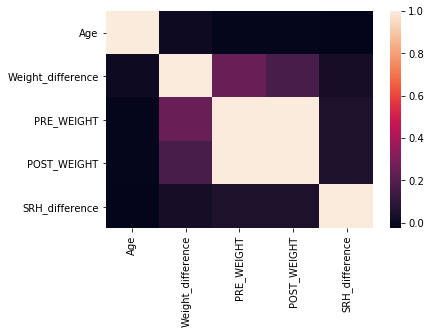

In [ ]:
sns.heatmap(corr1)

Control group's Pre_weight and Post_weight have very close to 1 coorelation,which means the weight change may not so significant.

In [ ]:
df_ctr_background.describe(include=['O'])

,Race,Sex,TIME,TIME_After
count,2500,2500,2500,2500
unique,5,2,1,1
top,White,FEMALE,PRE,POST
freq,1440,1285,2500,2500


In [ ]:
df_ctr_background.describe()

,subject_ID,Age,trt,SRH,SRH_After,PRE_WEIGHT,POST_WEIGHT,SRH_difference,Weight_difference,Group
count,2500.00000,2500.000000,2500.0,2494.000000,2498.000000,2500.000000,2500.000000,2492.000000,2500.000000,2500.0
mean,3750.50000,38.844040,0.0,2.993585,3.004003,159.923403,159.150366,0.010433,0.773036,0.0
std,721.83216,8.008994,0.0,1.581062,1.555535,21.391016,21.043802,1.128395,1.660073,0.0
min,2501.00000,18.200000,0.0,1.000000,1.000000,91.237920,90.156130,-4.000000,-4.832100,0.0
25%,3125.75000,33.200000,0.0,1.000000,2.000000,145.369300,144.722825,0.000000,-0.407975,0.0
50%,3750.50000,38.700000,0.0,3.000000,3.000000,159.126750,158.671500,0.000000,0.774800,0.0
75%,4375.25000,44.100000,0.0,5.000000,5.000000,174.413975,173.476575,0.000000,1.878900,0.0
max,5000.00000,66.500000,0.0,5.000000,5.000000,232.700800,229.274700,4.000000,6.116000,0.0


Analyze Data- We will understand if there is weight difference before and after intervention intragroup. If so, we will compare if there is weight difference before and afterintervention intergroup.

*** Intragroup (Understand each group if there is a significant difference in weight before and after intervention)**



I. Do a Hypothesis testing: (A tool to compare the distribution of 2 population, based on the samples we received.) 


  A. Treatment Group
  H0: The means of weights after intervention is the same as the means of weights before intervention in treatment group
  
  H1: The means of weights after intervention is not the same as the means of weights before intervention in treatment group

  B. Control Group
  H0: The means of weights after intervention is the same as the means of weights before intervention in Control group

  H1: The means of weights after intervention is not the same as the means of weights before intervention in Control group

  --> How are we going to decide how likly the samples, or more extreme ones, could have generated under H0. This possiblity is P-value. The lower it is, the more confident we can be in rejecting Ho. Here, we choose p=0.05. Usually when we do testing, we will choose 0.05 or 0.01. If we use 0.01, the test is more strict. P-value 0.05 means our result should be 95% confident to give similar kind of result in each sample. If the P-value of the result is lower than 0.05, we will reject H0. That means, the means of weights after intervention has no differentence compared to the means of weights before intervention
  
II. Choose testing Methods
  Since this is a before and after test in one object, we will use The paired sameple t-test to determinde whether the mean difference between two sets of observations is zero.
The data we used here qulifies the paired sample t-test requirement.
  A. The dependent variable is continous.
  B. The observations are independent of one another.
  C. The dependent variable should be approximately normally distributed.
  D. The dependent variable shuld not contain any outliners.
  
III. Explain the result

* Results: 

A: The p-value=0.0, which indicates strong evidennce we can reject the null hypothesis. It shows that the means of weights after intervention is not the same as the means of weights before intervention in treatment group. Under 95% confidence level, between 2500 samples in treatment group, the tester's weight before the intervention was higher (159.79±21.80 Lbs) compared to the weight post intervention (150.78±21.47Lbs). There is a statistically significant decrease in weight of 9.01 Lbs averagely.


B: The p-value=1.0899354309582919e-108, which is very small and a strong evidennce in favor of the alternative hypothesis. It shows that the means of weights after intervention is not the same as the means of weights before intervention in contropl group. Under 95% confidence level, between 2500 samples in control group, the tester's weight before the intervention was higher (159.92±21.39 Lbs) compared to the weight post intervention (159.15±21.04Lbs). There is a statistically significant decrease in weight of 0.67 Lbs averagely.





***Intergroup: check if there is a significant difference in Weight change between treatment group and control group**

I. Do a Hypothesis testing:


H0: The means of weights in treatment group is the same as the means of weights difference in control group

H1: The means of weight difference in treatment group is not the same as the means of weight diffence in control group
  
II. Choose testing Methods
To estimate one metric between 2 independent groups, we will use Independent T test to compare the means of two data sets.
The data we used here qulifies the indenpendent t-test requirements.

  A. The dependent variable is continous.
  B. The variances of the dependent variable should be equal.
  C. The dependent variable should be approximately normally distributed.
  D. The variances of dependent variable should be equal.--> Homogeneity of Variance. 
  
III. Explain the result

* Results: 
The indepent T test result show p value=0.0, which rejects H0. The means of weight difference in treatment group is not the same as the means of weight diffence in control group. Under 95% confindence level, we can say the new exercise has significant difference on tester's weight. Averagely, the testers who had the exercise in 6 months losed 9 Lbs while the control group losed 0.77 Lbs in 6 months.

IV. SRH Analysis: 

Q1: Does the intervention affect SRH in control group?

H0: The SRH before and after intervention in control group has no difference.

H1: The SRH before and after intervention in control group has difference.
Result: in control group, through Chi-square test,we found out P-value is 0.29 which is >0.5. That means, the SRH before and after intervention does not have significant difference.

Q2:Does the intervention affect SRH in treatment group?

H0: The SRH before and after intervention in treatment group has no difference.

H1: The SRH before and after intervention in treatment group has difference.
Result: in treatment group, through Chi-square test, in 95 % confident level,we found out P-value is  3.78699840635385e-40 which is <0.5. That means, the SRH before and after intervention have significant difference. And, when we take a closer look, testers in treatment group felt more healthier. The amount of feeling very poor decreased 36% while the amount of feeling excellent increased 31% after 6 months testing period.






Text(0.5, 1.0, 'Box plot for Pre weight and P\\ost weight in treatment group')

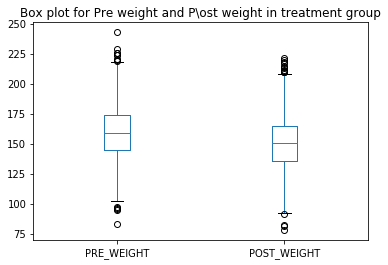

In [ ]:
# Data exploration in treatment group 
df_tre_background[['PRE_WEIGHT','POST_WEIGHT']].plot(kind='box') 
plt.title('Box plot for Pre weight and P\ost weight in treatment group')


In [ ]:
df_tre_background[['PRE_WEIGHT','POST_WEIGHT']].describe()

,PRE_WEIGHT,POST_WEIGHT
count,2500.000000,2500.000000
mean,159.786775,150.784382
std,21.803354,21.466418
min,82.803790,78.090870
25%,144.966550,135.869950
50%,159.066500,150.781150
75%,174.284100,164.941650
max,242.763200,221.296700


Text(0.5, 1.0, 'Weight difference distribution in treament group')

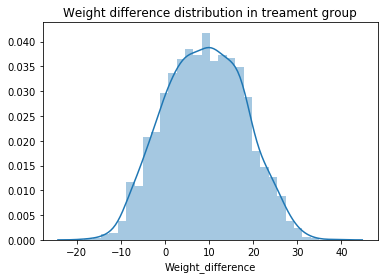

In [ ]:
# Check: Normal Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot (df_tre_background['Weight_difference']) 
plt.title('Weight difference distribution in treament group')

In [ ]:
#Paired Samples T-Test in treatment group
from scipy import stats
stats.ttest_rel(df_tre_background['PRE_WEIGHT'],df_tre_background['POST_WEIGHT'])


Ttest_relResult(statistic=50.23296525299544, pvalue=0.0)



*  Results: The p-value=0.0, which indicates strong evidennce we can reject the null hypothesis. It shows that the means of weights after intervention is not the same as the means of weights before intervention in treatment group. Under 95% confidence level, between 2500 samples in treatment group, the tester's weight before the intervention was higher (159.79±21.80 Lbs) compared to the weight post intervention (150.78±21.47Lbs). There is a statistically significant decrease in weight of 9.01 Lbs averagely.







Text(0.5, 1.0, 'Box plot for Pre weight and Post weight in control group')

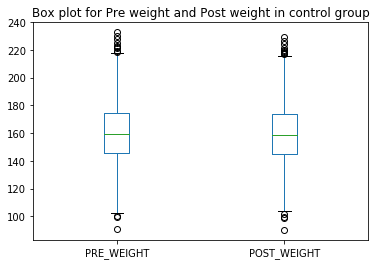

In [ ]:
# Data exploration in control group 
df_ctr_background[['PRE_WEIGHT','POST_WEIGHT']].plot(kind='box') 
plt.title('Box plot for Pre weight and Post weight in control group')

In [ ]:
df_ctr_background[['PRE_WEIGHT','POST_WEIGHT']].describe()

,PRE_WEIGHT,POST_WEIGHT
count,2500.000000,2500.000000
mean,159.923403,159.150366
std,21.391016,21.043802
min,91.237920,90.156130
25%,145.369300,144.722825
50%,159.126750,158.671500
75%,174.413975,173.476575
max,232.700800,229.274700


In [ ]:
df_ctr_background['Weight_difference'].describe()


count    2500.000000
mean        0.773036
std         1.660073
min        -4.832100
25%        -0.407975
50%         0.774800
75%         1.878900
max         6.116000
Name: Weight_difference, dtype: float64

In [ ]:
df_tre_background['Weight_difference'].describe()

count    2500.000000
mean        9.002393
std         8.960643
min       -18.347900
25%         2.372100
50%         9.112550
75%        15.681450
max        38.801200
Name: Weight_difference, dtype: float64

Text(0.5, 1.0, 'Weight difference distribution in treatment group')

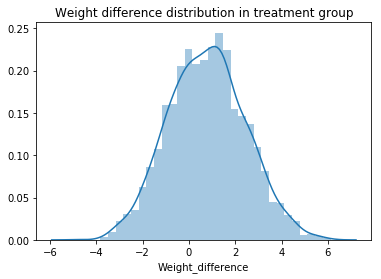

In [ ]:
# Check: Normal Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot (df_ctr_background['Weight_difference']) 
plt.title('Weight difference distribution in treatment group')

Text(0.5, 1.0, 'Weight difference distribution in control group')

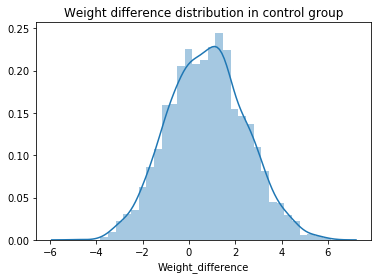

In [ ]:
# Check: Normal Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot (df_ctr_background['Weight_difference']) 
plt.title('Weight difference distribution in control group')

In [ ]:
#Paired Samples T-Test in control group
from scipy import stats
stats.ttest_rel(df_ctr_background['PRE_WEIGHT'],df_ctr_background['POST_WEIGHT'])


Ttest_relResult(statistic=23.28320529910196, pvalue=1.0899354309582919e-108)


*  Results: The p-value=1.0899354309582919e-108, which is very small and a strong evidennce in favor of the alternative hypothesis. It shows that the means of weights after intervention is not the same as the means of weights before intervention in contropl group. Under 95% confidence level, between 2500 samples in control group, the tester's weight before the intervention was higher (159.92±21.39 Lbs) compared to the weight post intervention (159.15±21.04Lbs). There is a statistically significant decrease in weight of 0.67 Lbs averagely.


In [ ]:
import statistics
statistics.variance(df_tre_background['Weight_difference'])

80.29312502002367

In [ ]:
import statistics
statistics.variance(df_ctr_background['Weight_difference'])

2.755842469355034

In [ ]:
#Hompgeneity test
stats.levene(df_ctr_background['Weight_difference'].dropna(),df_tre_background['Weight_difference'].dropna())

LeveneResult(statistic=3394.3379103766347, pvalue=0.0)

* Result: The p-value of the Levene is 0.0, which means the variences for these two groups are not same. Since the data are from two indepent and random groups and both of them have normal distribution, we can keep use independent t-test.

In [ ]:
#Independent T-Test in weight changebetween 2 groups
from scipy import stats
stats.ttest_ind(df_tre_background['Weight_difference'],df_ctr_background['Weight_difference'],equal_var=False)

Ttest_indResult(statistic=45.15114745232794, pvalue=0.0)

* Result: The indepent  T test result show p value=0.0, which rejects H0. The means of weight difference in treatment group is not the same as the means of weight diffence in control group. Under 95% confindence level, we can say the new exercise has significant influence on tester's weight.Averagely, the testers who had the exercise in 6 months losed 9 Lbs while the control group losed 0.77 Lbs in 6 months.

In [ ]:
#Independent T-Test in SRH change between 2 groups
from scipy import stats
stats.ttest_ind(df_tre_background['SRH_difference'],df_ctr_background['SRH_difference'])

Ttest_indResult(statistic=nan, pvalue=nan)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


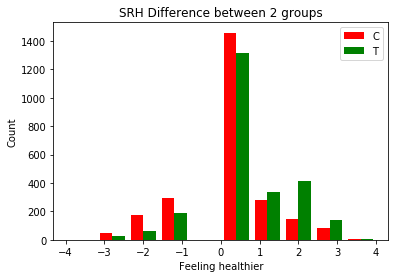

In [ ]:
import matplotlib.pyplot as plt
colors=['r','g']
flg,ax1=plt.subplots()
ax1.hist([df_ctr_background['SRH_difference'],df_tre_background['SRH_difference']], color=colors)
plt.title('SRH Difference between 2 groups')
plt.xlabel('Feeling healthier')
plt.ylabel('Count')
plt.legend('CT')
plt.show()

from scipy.stats import chi2_contingency



In [ ]:
df_ctr_background.groupby(df_ctr_background['SRH']).describe()

subject_ID                                   ... Group               
         count         mean         std     min  ...   25%  50%  75%  max
SRH                                              ...                     
1        655.0  3761.149618  708.130939  2502.0  ...   0.0  0.0  0.0  0.0
2        463.0  3785.321814  734.796272  2501.0  ...   0.0  0.0  0.0  0.0
3        315.0  3752.660317  713.599628  2505.0  ...   0.0  0.0  0.0  0.0
4        365.0  3746.147945  717.754615  2503.0  ...   0.0  0.0  0.0  0.0
5        696.0  3718.612069  732.035117  2504.0  ...   0.0  0.0  0.0  0.0

[5 rows x 56 columns]

In [ ]:
df_ctr_background.groupby(df_ctr_background['SRH_After']).describe()

subject_ID                                   ... Group               
               count         mean         std     min  ...   25%  50%  75%  max
SRH_After                                              ...                     
1              615.0  3762.783740  713.034432  2502.0  ...   0.0  0.0  0.0  0.0
2              485.0  3780.000000  742.997831  2501.0  ...   0.0  0.0  0.0  0.0
3              359.0  3740.206128  729.822816  2503.0  ...   0.0  0.0  0.0  0.0
4              353.0  3752.490085  687.386991  2530.0  ...   0.0  0.0  0.0  0.0
5              686.0  3724.336735  728.008273  2504.0  ...   0.0  0.0  0.0  0.0

[5 rows x 56 columns]

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
Chi_ctr_SRH=np.array([[655,615],[463,485],[315,359],[365,353],[696,686]])

chi2_contingency(Chi_ctr_SRH)

(4.912508632816851,
 0.29639303595927835,
 4,
 array([[634.4911859 , 635.5088141 ],
        [473.62019231, 474.37980769],
        [336.72996795, 337.27003205],
        [358.71233974, 359.28766026],
        [690.4463141 , 691.5536859 ]]))

*Analysis:
Does the intervention affect SRH in control group?

H0: The SRH before and after intervention in control group has no difference.

H1: The SRH before and after intervention in control group has difference.
Result: in control group, through Chi-square test,we found out P-value is 0.29 which is >0.5. That means, the SRH before and after intervention does not have significant difference.


In [ ]:
df_tre_background.groupby(df_tre_background['SRH']).describe()

subject_ID                                        ... Group                    
         count         mean         std   min    25%  ...   min  25%  50%  75%  max
SRH                                                   ...                          
1        660.0  1232.984848  725.190570  11.0  584.5  ...   1.0  1.0  1.0  1.0  1.0
2        496.0  1296.935484  727.316629   2.0  678.5  ...   1.0  1.0  1.0  1.0  1.0
3        296.0  1244.729730  704.109676   3.0  665.0  ...   1.0  1.0  1.0  1.0  1.0
4        371.0  1224.150943  732.947433   1.0  563.5  ...   1.0  1.0  1.0  1.0  1.0
5        673.0  1247.934621  714.198063   7.0  641.0  ...   1.0  1.0  1.0  1.0  1.0

[5 rows x 56 columns]

In [ ]:
df_tre_background.groupby(df_tre_background['SRH_After']).describe()

subject_ID                                 ... Group               
               count         mean         std   min  ...   25%  50%  75%  max
SRH_After                                            ...                     
1              424.0  1185.747642  743.613867   2.0  ...   1.0  1.0  1.0  1.0
2              267.0  1272.071161  758.358411   1.0  ...   1.0  1.0  1.0  1.0
3              441.0  1252.566893  700.125233  12.0  ...   1.0  1.0  1.0  1.0
4              481.0  1301.459459  720.530773   3.0  ...   1.0  1.0  1.0  1.0
5              881.0  1245.803632  710.311672   6.0  ...   1.0  1.0  1.0  1.0

[5 rows x 56 columns]

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
Chi_tre_SRH=np.array([[660,424],[496,267],[296,441],[371,481],[673,881]])

chi2_contingency(Chi_tre_SRH)

(190.6794211775988,
 3.78699840635385e-40,
 4,
 array([[542.21723447, 541.78276553],
        [381.65290581, 381.34709419],
        [368.64769539, 368.35230461],
        [426.17074148, 425.82925852],
        [777.31142285, 776.68857715]]))

*Analysis:
Does the intervention affect SRH in treatment group?

H0: The SRH before and after intervention in treatment group has no difference.

H1: The SRH before and after intervention in treatment group has difference.
Result: in treatment group, through Chi-square test, in 95 % confident level,we found out P-value is  3.78699840635385e-40 which is <0.5. That means, the SRH before and after intervention have significant difference. And, when we take a closer look, testers in treatment group felt more healthier. The amount of feeling very poor decreased 36% while the amount of feeling excellent increased 31% after 6 months testing period.